<a href="https://colab.research.google.com/github/valeriamedina2/Regresion-No-lineal-y-Regresion-Logistica/blob/main/2022_8_Regresion_No_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión no lineal
## Equipo 8

# GASTOS **2022**

In [ ]:
#Cargamos librerias
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score
import pandas as pd

In [ ]:
#Cargar archivo csv desde seaborn
df= pd.read_csv('22_gastos.csv')
df

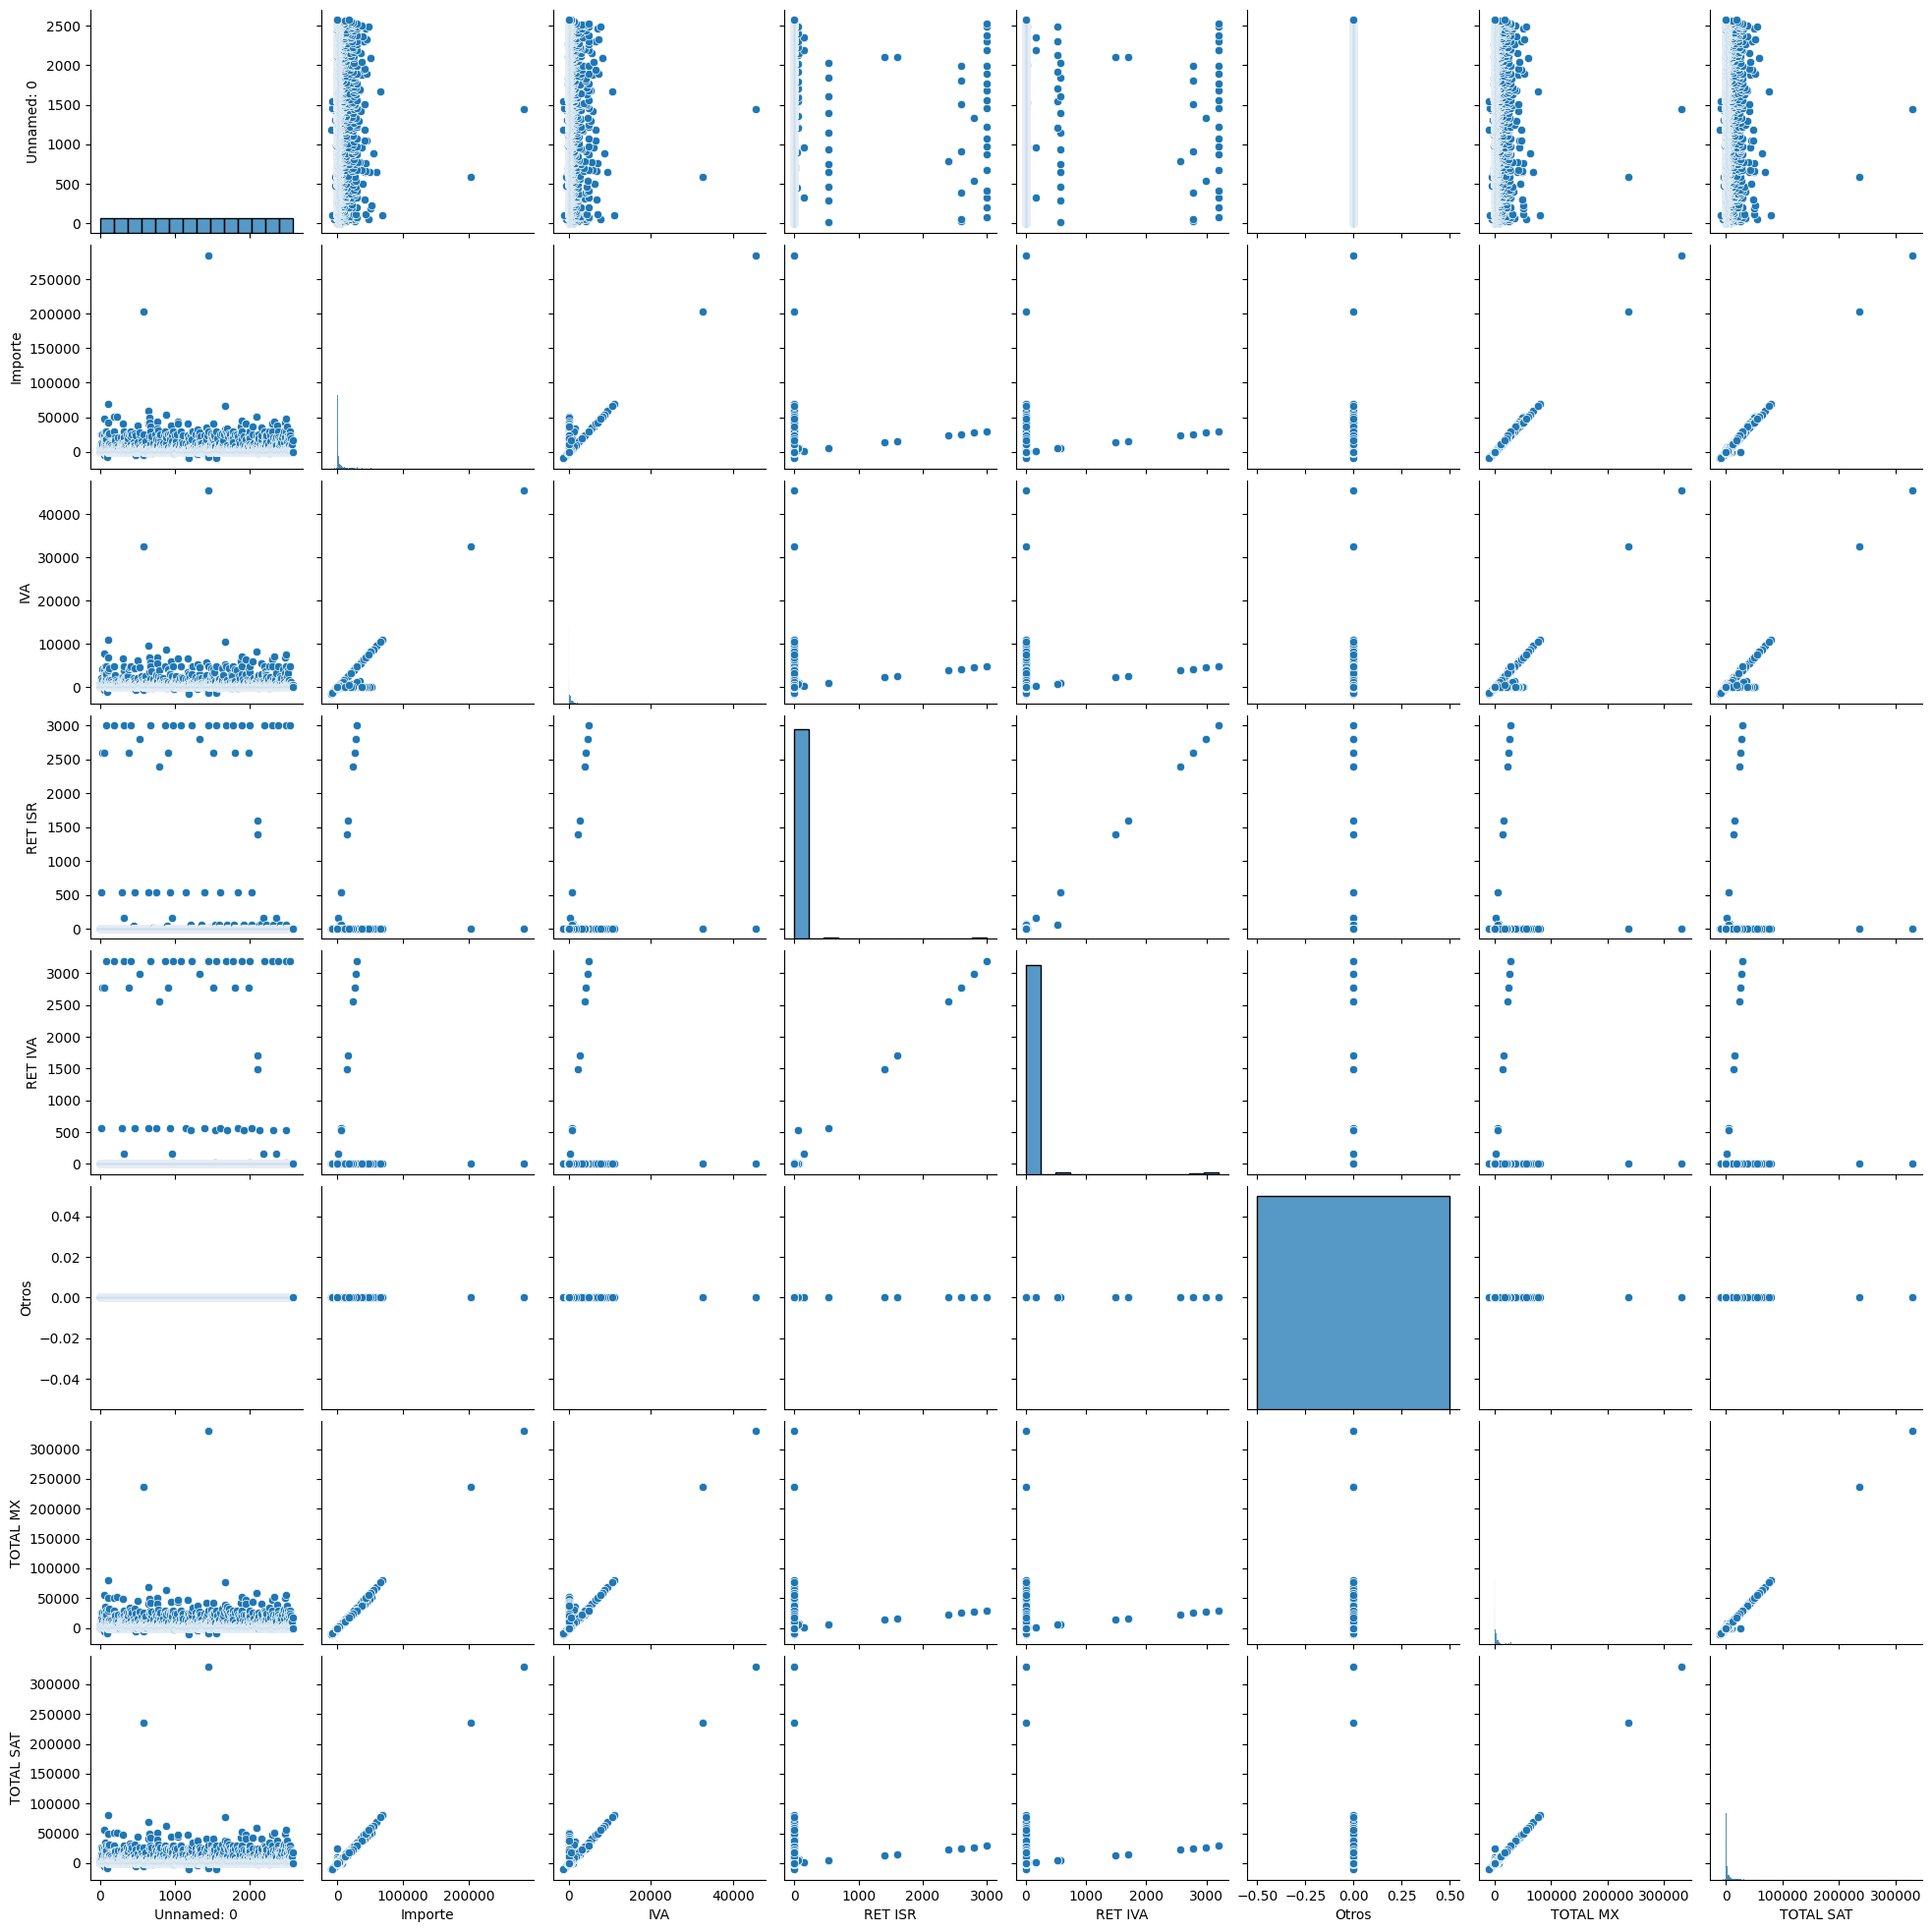

In [ ]:
#Graficamos todas las dispersiones entre todas las variables
sns.pairplot(df)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['IVA']]
Var_Dep= df['TOTAL MX']

In [ ]:
#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

   ** Usamos las siguientes ecuaciones como funciones de ajuste.**

            y = ax^2 + bx + c

            y = ax^3 + bx + c

            y = ax^3 + bx^2 + c

            y = a*exp(bx) + c

**MODELO 1**

In [ ]:
def  func1 (x, a, b, c):
     return a*x**2 + b*x + c

In [ ]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, df['IVA'], df['TOTAL MX'])

In [ ]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([1.56201988e-05, 6.58274851e+00, 1.14179671e+03])

In [ ]:
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, df['IVA'], df['TOTAL MX'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a * x ** 2 + b * x + c

In [ ]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
#x= x.reshape(51, 1)
#y = y.reshape(51, 1)
#yfit1 = yfit1.reshape(51, 1)
yfit1

,IVA
0,7001.048906
1,7001.709956
2,1141.796711
3,1141.796711
4,1141.796711
...,...
2572,1141.796711
2573,4544.765551
2574,1141.796711
2575,1141.796711


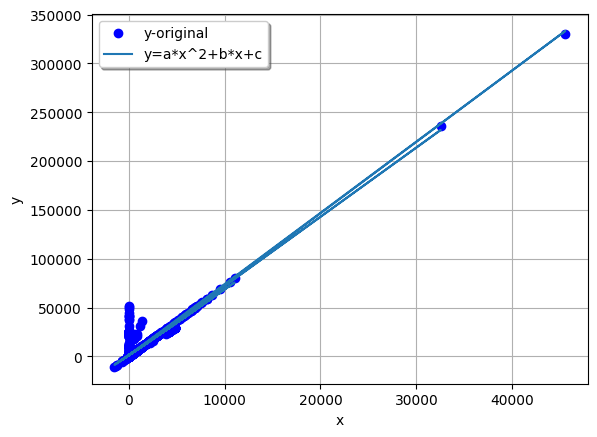

In [ ]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [ ]:
#Calculamos el coeficiente de determinación del modelo

R2 = r2_score(y, yfit1) 
R2

0.8397849221560657

**MODELO 2**

Regresion lineal

In [ ]:
#Imprimimos el scatter plot entre la variable dependiente (total) e independiente (alchool) 
#para observar el comportamiento en su dispersión 
from turtle import color


sns.scatterplot(x='IVA', y='TOTAL MX', color="blue", data=df)
#sns.scatterplot(X='speeding', y='total', color="red", data=df)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_Indep= df[['alcohol', 'speeding']]
Vars_Indep= df[['IVA']]
Var_Dep= df['TOTAL MX']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.838312234112905

In [ ]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['alcohol', 'speeding']])
y_pred= model.predict(X=df[['IVA']])
y_pred

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones', y_pred)
df

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.838312234112905

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.915593924244206